Exploring & Machine Learning for Airbnb Listings in Austriala 

In [ ]:
import nltk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
listings = pd.read_csv('melbourne-2016-01-03-listings.csv')
calendar = pd.read_csv('melbourne-2016-01-03-calendar.csv')
reviews = pd.read_csv('melbourne-2016-01-03-reviews.csv')

C:\Users\mvesk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Calender
How busy is it for Airbnb hosts in melbourne?

In [6]:

print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

We have 365 days and 8633 unique listings in the calendar data.


In [7]:
#Date range of data
calendar.date.min(), calendar.date.max()

('2016-01-03', '2017-01-01')

In [8]:

calendar.isnull().sum()

listing_id          0
date                0
available           0
price         2601925
dtype: int64

In [9]:
calendar.shape

(5894385, 4)

In [8]:
calendar.head(100)

,listing_id,date,available,price
0,6682197,2016-01-03,f,NaN
1,6682197,2016-01-04,f,NaN
2,6682197,2016-01-05,f,NaN
3,6682197,2016-01-06,f,NaN
4,6682197,2016-01-07,f,NaN
5,6682197,2016-01-08,t,$130.00
6,6682197,2016-01-09,t,$130.00
7,6682197,2016-01-10,t,$130.00
8,6682197,2016-01-11,f,NaN
9,6682197,2016-01-12,f,NaN


In [9]:

calendar.available.value_counts()

t    2069865
f    1081180
Name: available, dtype: int64

f (false) means not available, t(true) means available.

Find out daily average availability for one year. Convert available column to 0 if available and 1 if not.

In [10]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

C:\Users\mvesk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


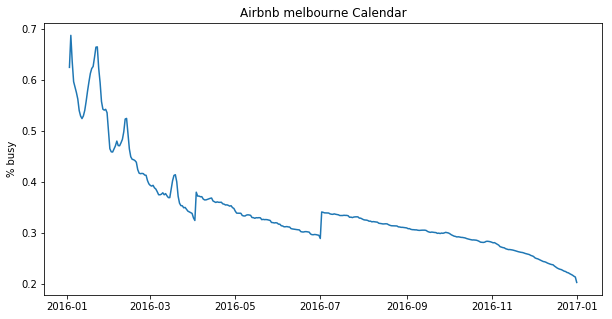

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb melbourne Calendar')
plt.ylabel('% busy')
plt.show();

In [12]:
calendar.head()

,listing_id,date,available,price
0,6682197,2016-01-03,f,NaN
1,6682197,2016-01-04,f,NaN
2,6682197,2016-01-05,f,NaN
3,6682197,2016-01-06,f,NaN
4,6682197,2016-01-07,f,NaN


Price on the Calendar
How prices change over the year by month?

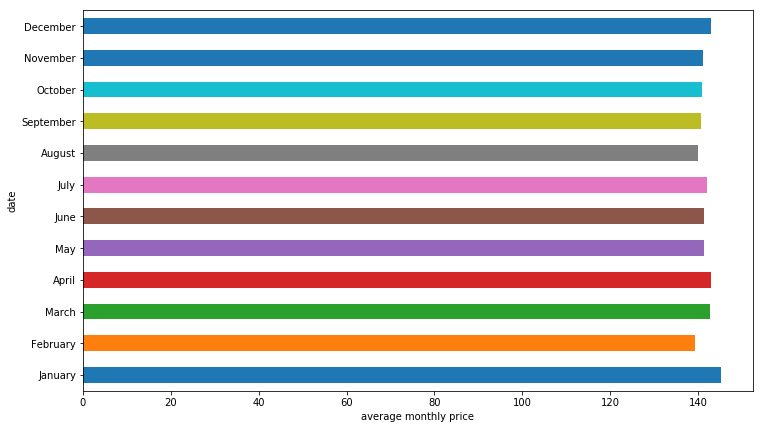

In [13]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

How price changes during day of week?

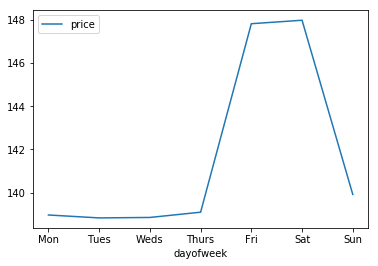

In [14]:



calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id', axis=1, inplace=True)
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);

In [17]:
plt.savefig('dayoftheweekByprice.png')


<Figure size 432x288 with 0 Axes>

C:\Users\mvesk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


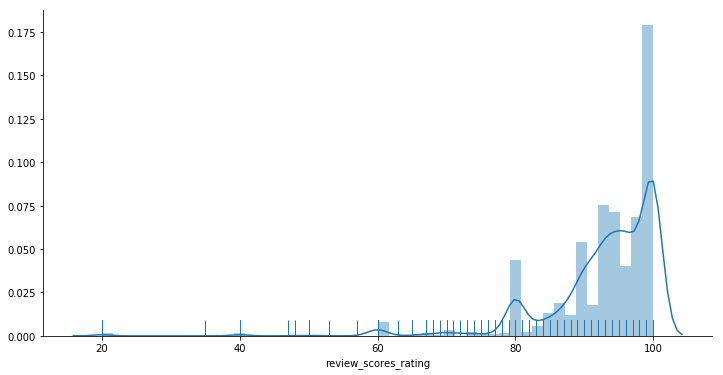

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [18]:
plt.savefig('review_score_rating_frequancy.png')

<Figure size 432x288 with 0 Axes>

In [21]:
listings.review_scores_rating.describe()

count    5742.000000
mean       92.772553
std         8.871874
min        20.000000
25%        90.000000
50%        95.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

most reviewsr leave a high score

In [16]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)

listings['price'].describe()

count     8633.000000
mean       136.956794
std        158.718454
min         12.000000
25%         67.000000
50%        100.000000
75%        169.000000
max      10003.000000
Name: price, dtype: float64

The most expensive Airbnb listing in Melbone is at $10,003/night.

In [23]:
listings.iloc[np.argmax(listings['price'])]

C:\Users\mvesk\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


id                                                                            8544404
listing_url                                      https://www.airbnb.com/rooms/8544404
scrape_id                                                              20160103104601
last_scraped                                                               2016-01-03
name                                                               不出租 不知道怎么删除房源 不好意思
summary                             步行可到达阿尔伯特公园,皇家植物园｡门口有多路电车,可直达唐人街,主要商业街Swanston...
space                               没有房东同住 整套出租 也可以拼租  this is contact phone: (pho...
description                         步行可到达阿尔伯特公园,皇家植物园｡门口有多路电车,可直达唐人街,主要商业街Swanston...
experiences_offered                                                              none
neighborhood_overview                                                             NaN
notes                                                                             NaN
transit                                               

In [19]:

listings.loc[listings['price'] == 0]['price'].count()


0

In [20]:
listings.loc[listings['price'] > 800]['price'].describe()

count       38.000000
mean      1351.657895
std       1478.049761
min        801.000000
25%        882.500000
50%       1000.000000
75%       1349.250000
max      10003.000000
Name: price, dtype: float64

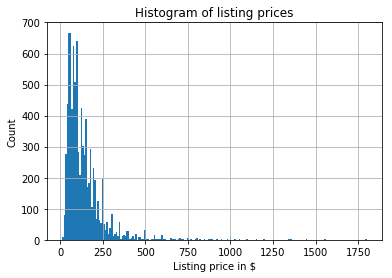

In [21]:
listings.loc[(listings.price <= 1800) & (listings.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

In [22]:
plt.savefig('Histaagramoflistingprices.png')

<Figure size 432x288 with 0 Axes>

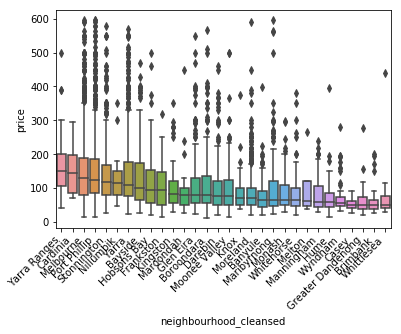

In [23]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

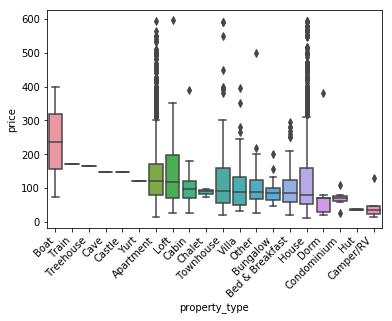

In [24]:

sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

In [39]:
listings.property_type.value_counts()


Apartment          5029
House              2975
Bed & Breakfast     198
Townhouse           197
Villa                62
Loft                 38
Other                35
Bungalow             35
Cabin                25
Dorm                 13
Camper/RV             6
Condominium           6
Hut                   3
Boat                  3
Chalet                3
Castle                1
Yurt                  1
Treehouse             1
Train                 1
Cave                  1
Name: property_type, dtype: int64

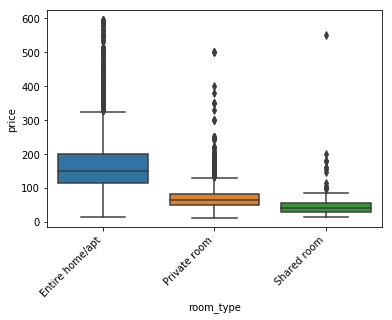

In [25]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

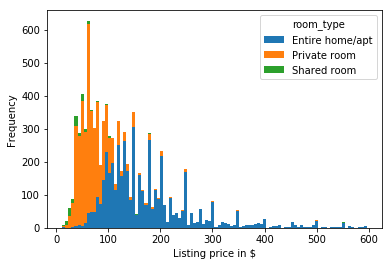

In [26]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $');

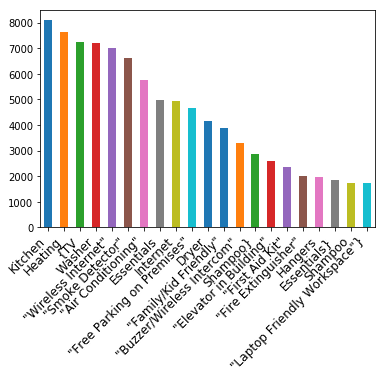

In [44]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(21)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

In [43]:
listings.amenities.value_counts()

{}                                                                                                                                                                                                                                                                                                                     139
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials}                                                                                                                                                                            33
{TV,"Cable TV",Internet,"Air Conditioning",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly",Washer,Dryer}                                                                                                                                                                                               20
{TV,Internet,"Wireless Internet","Air Conditioning",Kit

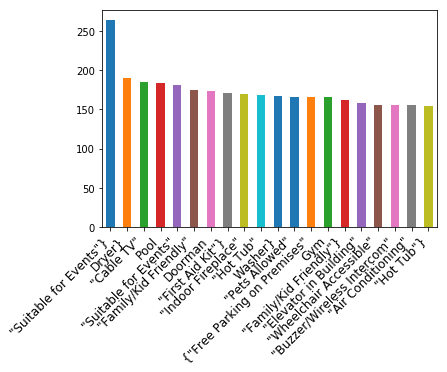

In [45]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

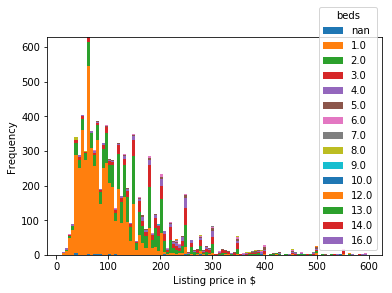

In [46]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

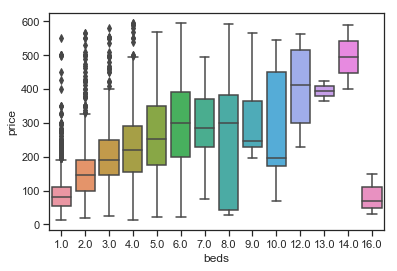

In [49]:
sns.boxplot(y='price', x='beds', data = listings.loc[(listings.price <= 600) & (listings.price > 0)])
plt.show();

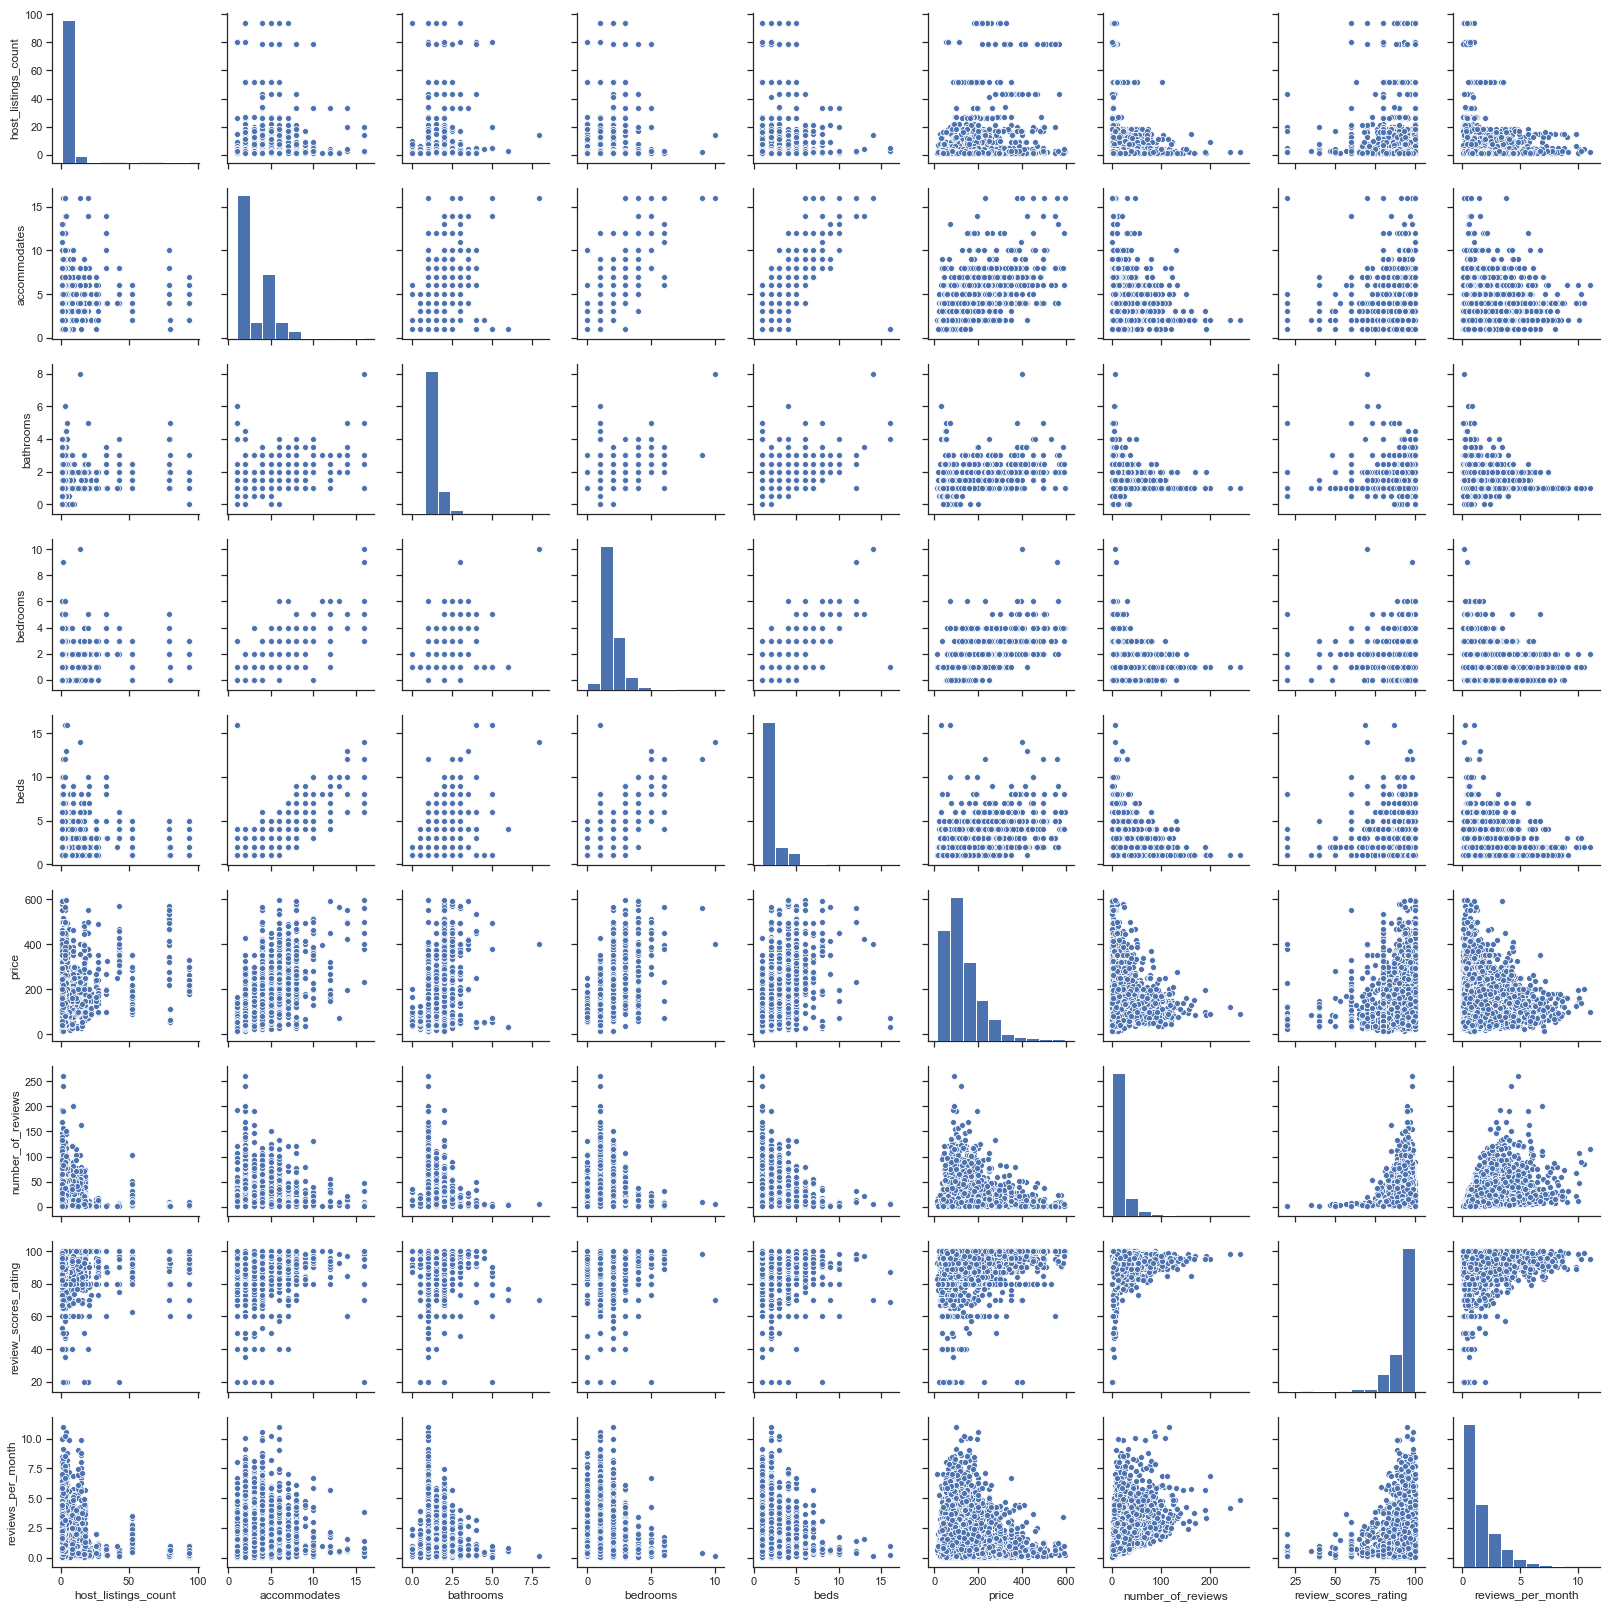

In [50]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
sns.set(style="ticks", color_codes=True)
sns.pairplot(listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna())
plt.show();

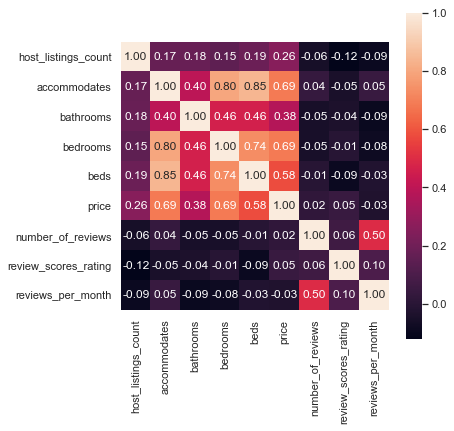

In [51]:
corr = listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();


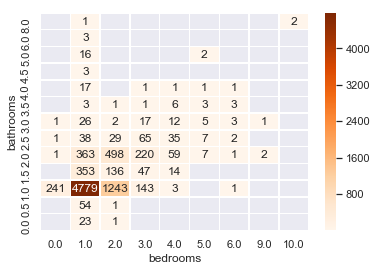

In [52]:
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();
#so cool

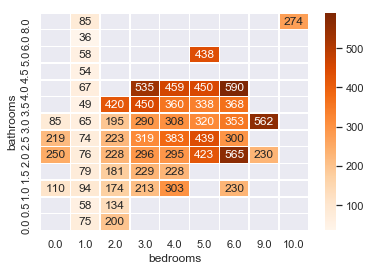

In [53]:
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show();

Predict

In [55]:
listings = pd.read_csv('melbourne-2016-01-03-listings.csv')

C:\Users\mvesk\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings = listings.loc[(listings.price <= 600) & (listings.price > 0)]

In [57]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [58]:
listings.amenities.head()

0    TV,Internet,Wireless Internet,Air Conditioning...
1    TV,Internet,Wireless Internet,Kitchen,Free Par...
2    TV,Internet,Wireless Internet,Air Conditioning...
3    TV,Cable TV,Internet,Wireless Internet,Air Con...
4    Kitchen,Free Parking on Premises,Washer,Essent...
Name: amenities, dtype: object

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

In [60]:
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)

In [61]:
listings['security_deposit'] = listings['security_deposit'].fillna(value=0)
listings['security_deposit'] = listings['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee'] = listings['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

In [62]:
listings_new = listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]


In [63]:
for col in listings_new.columns[listings_new.isnull().any()]:
    print(col)

host_is_superhost
host_identity_verified
host_has_profile_pic
host_listings_count
host_total_listings_count
bathrooms
bedrooms
review_scores_rating


In [64]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

C:\Users\mvesk\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [65]:
for cat_feature in ['zipcode', 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)

In [66]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

Random Forest Regressor

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

C:\Users\mvesk\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RMSE test: 50.727
R^2 test: 0.649


Feature importance of Random Forest

In [68]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
14,bedrooms,0.460824
13,bathrooms,0.069247
259,Entire home/apt,0.066235
8,security_deposit,0.041832
9,cleaning_fee,0.037604
16,number_of_reviews,0.017043
12,minimum_nights,0.015032
15,guests_included,0.014123
11,host_total_listings_count,0.013369
17,review_scores_rating,0.013192
